<a href="https://colab.research.google.com/github/myleskeller/ColabOffloading/blob/main/BlenderCLI_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blender Rendering Script for Colab
This is a script for performing command line Blender renders in Google Collab.
  

  
Prior to use:
- Make sure that your `.blend` file has **GPU Compute** set as the render device.  
- Make sure that the Colab runtime hardware accelerator is set to **GPU**.

Notes:
- If rendering on the GPU doesn't work for whatever reason, you can use CPU rendering. **In my testing, GPU was 98.73% faster than CPU.**

# Configuration

In [69]:
#@title Blender Parameters

renderer = "CYCLES" #@param ["CYCLES", "BLENDER_RENDER"]
frame = 1  #@param {type: "number"}
blender_version = "2.92.0" #@param {type:"string"}
render_hardware = "GPU" #@param ["GPU", "CPU"]

# File Source
Choose one.

In [ ]:
#@title Direct Upload { vertical-output: true }

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  drive_file_path = './' + fn

#@markdown - Click *Choose Files* below 
#@markdown - Find the desired `.blend` file

# input file path
print("File path: " + drive_file_path)
# output file path
output_file = "//" + fn.split('.')[0] + '_'
# print(output_file)

In [ ]:
#@title Google Drive { vertical-output: true }

# actual gogle drive stuff
from google.colab import drive
drive.mount('/content/drive')

#@markdown - In the *Files* pane, find the desired `.blend` file  under the folder **drive**
#@markdown - click *Copy path* in the overflow menu of the file
#@markdown - paste the result in the input field below

# input file path
drive_file_path = '/content/drive/MyDrive/blender/hand.blend' #@param {type: "string"}
# output file path
output_file = "//" + fn.split('/')[-1].split('.')[0] + '_'

# Render

In [71]:
#@title Attempt to Prevent Disconnects { vertical-output: true }
import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


In [72]:
#@title Install Blender
blender_version_trimmed = blender_version.rstrip('0').rstrip('.')
blender_url = "https://download.blender.org/release/Blender" + blender_version_trimmed + "/blender-" + blender_version + "-linux64.tar.xz"
blender_tar = "blender-" + blender_version + "-linux64.tar.xz"
blender_path = "./blender-" + blender_version + "-linux64/blender"

# !apt install blender
# !wget https://download.blender.org/release/Blender2.92/blender-2.92.0-linux64.tar.xz
# !tar xf blender-2.92.0-linux64.tar.xz
# !./blender-2.92.0-linux64/blender -v

# downloading python script to enable GPU rendering
!wget https://raw.githubusercontent.com/myleskeller/ColabOffloading/main/blender_gpu.py

# installing supporting libraries
!apt install libboost-all-dev
!apt install libgl1-mesa-dev

# downloading and extracting blender
!wget $blender_url
!tar xf $blender_tar

# attempting to fix that stupid "src/tcmalloc.cc:283] Attempt to free invalid pointer 0x7f9aa682b000" error..
!sudo apt remove libtcmalloc-minimal4
!sudo apt-get install libtcmalloc-minimal4
# consequently, it always shows "ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored." in the CLI, but it doesn't seem to impact functionality.

# if this outputs the blender version, it'll probably work.
!$blender_path -v

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
--2021-03-23 20:14:24--  https://raw.githubusercontent.com/myleskeller/ColabOffloading/main/blender_gpu.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 790 [text/plain]
Saving to: ‘blender_gpu.py.1’

blender_gpu.py.1    100%[===================>]     790  --.-KB/s    in 0s      

2021-03-23 20:14:25 (44.9 MB/s) - ‘blender_gpu.py.1’ saved [790/790]

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared ob

In [73]:
#@title Render on GPU
if (render_hardware == "GPU"):
  print("rendering file located at: "+drive_file_path+"\n")

  !$blender_path -b $drive_file_path -F PNG -noaudio -o $output_file -E $renderer -x 1 -P blender_gpu.py -f $frame
  # -b = Render in the background (without UI).
  # -o = Path of where to save the rendered image, using five padded zeros for the frame number.
  # -E = Use the «$renderer» rendering engine.
  # -x = Set option to add the file extension to the end of the file. (boolean)
  # -P = load the «filename» python script.
  # -f = $frame = Render only the «$frame»th frame.

rendering file located at: ./hand.blend

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
Blender 2.92.0 (hash 02948a2cab44 built 2021-02-25 09:31:37)
ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (cannot open shared object file): ignored.
Read blend: /content/./hand.blend
Fra:1 Mem:116.44M (Peak 152.09M) | Time:00:01.29 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Synchronizing object | human_male_base03
Fra:1 Mem:142.26M (Peak 152.09M) | Time:00:01.39 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Initializing
Fra:1 Mem:87.60M (Peak 152.09M) | Time:00:01.40 | Mem:0.00M, Peak:0.00M | Scene, RenderLayer | Waiting for render to start
Fra:1 Mem:87.62M (Peak 152.09M) | Time:00:01.40 | Mem:0.00M,

In [74]:
#@title Render on CPU (fallback)

if (render_hardware == "CPU"):
  print("rendering file located at: "+drive_file_path+"\n")
  !$blender_path -b $drive_file_path -noaudio -o $output_file -F PNG -E $renderer -x 1 -f $frame
  # -b = Render in the background (without UI).
  # -o = Path of where to save the rendered image, using five padded zeros for the frame number.
  # -F = Set the render format. Valid options are: TGA RAWTGA JPEG IRIS IRIZ AVIRAW AVIJPEG PNG BMP
  # -E = Use the «$renderer» rendering engine.
  # -x = Set option to add the file extension to the end of the file. (boolean)
  # -f = $frame = Render only the «$frame»th frame.

# Results

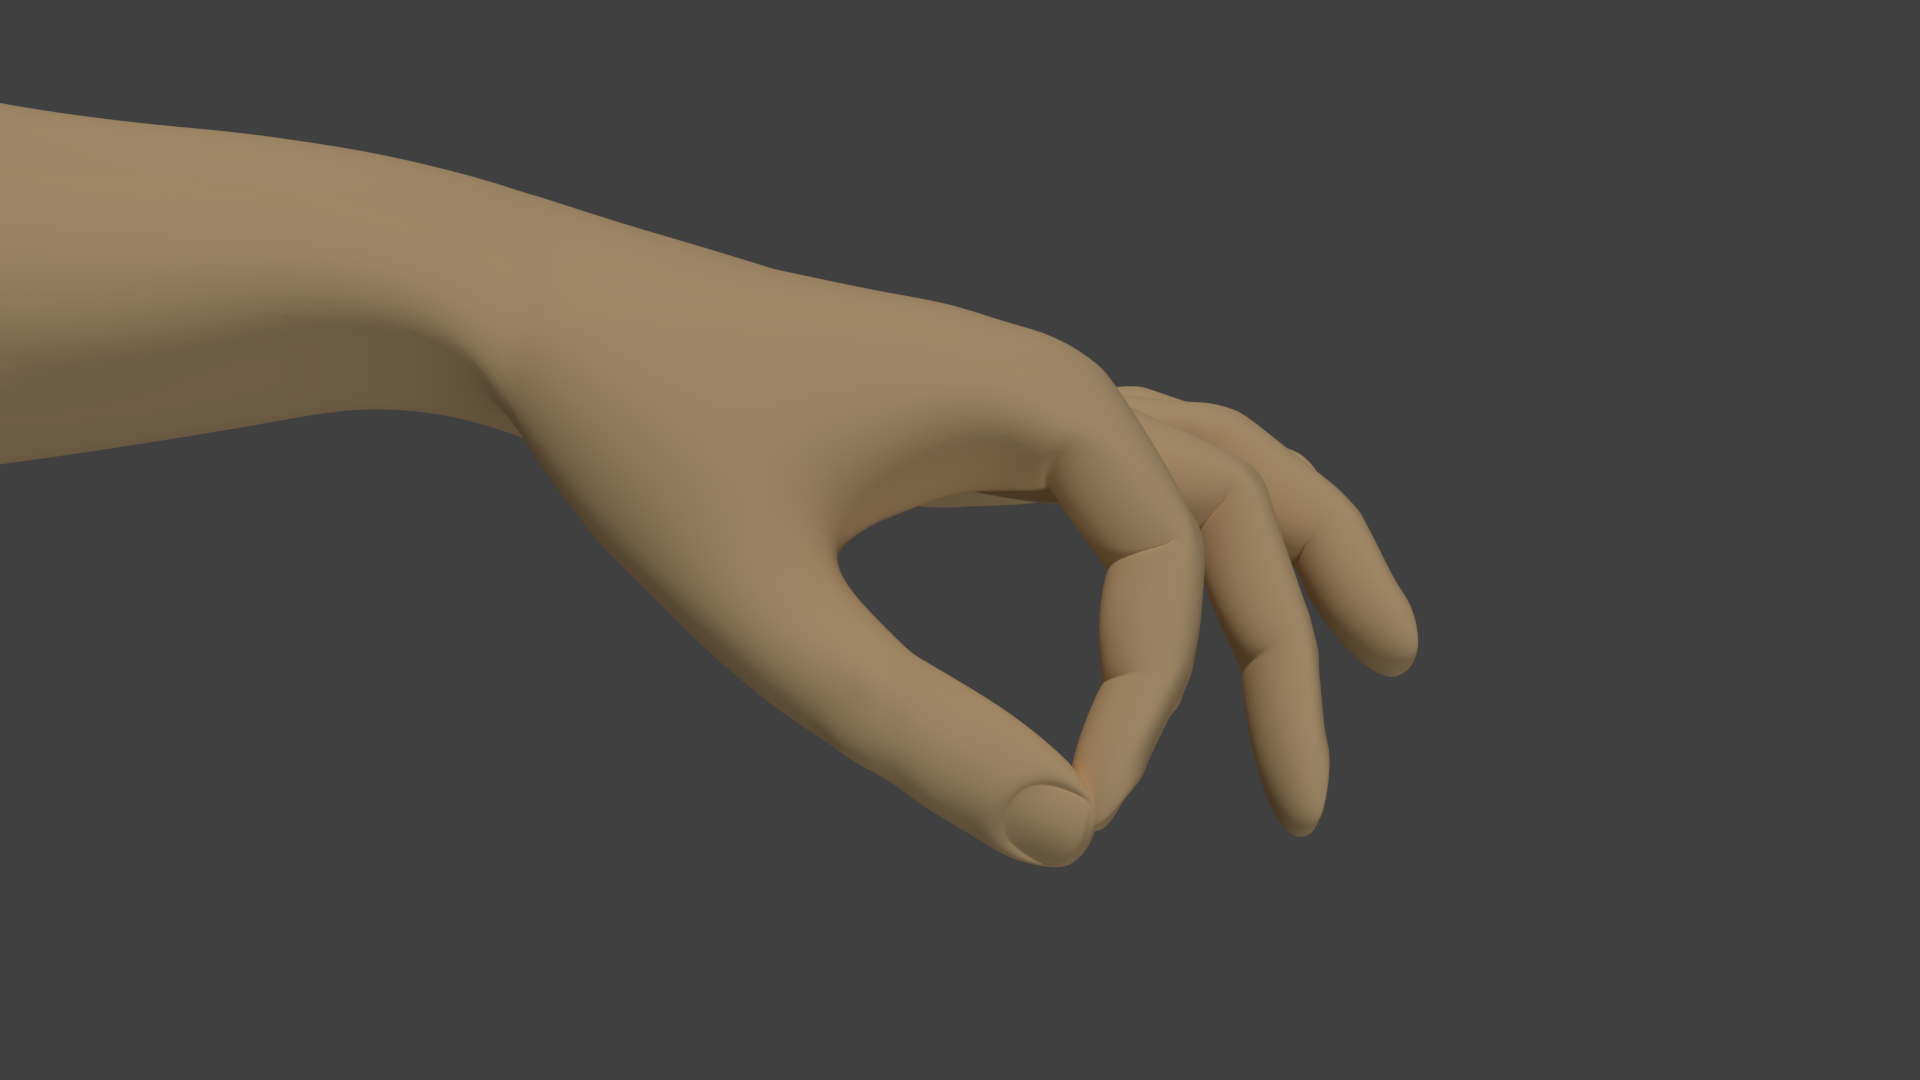

In [75]:
#@title Display Result
from IPython.display import Image
import os.path
from os import path


if (path.exists(final_output) == False):
  file_actual = drive_file_path.split('.')[0].split('/')[-1]
  path_mostly = drive_file_path.split('.')[0]
  out = path_mostly.replace(file_actual, final_output.replace("./",""))
else:
  out = final_output

Image(filename=out)

In [76]:
#@title Download Result { vertical-output: true }
from google.colab import files
files.download(out)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>